In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [154]:
cols = list(pd.read_csv("stage3.csv", nrows =1))
df= pd.read_csv("stage3.csv", usecols =[i for i in cols if i != 'sources'])
df.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,NaN,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,Unprovoked drive-by results in multiple teens ...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::

In [155]:
df["date"] = pd.to_datetime(df["date"])
df_2013_2018 = df.iloc[:-13802]
df = df.iloc[164474:]
df = df.iloc[:-13802]
df_2013_2018.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,NaN,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,Unprovoked drive-by results in multiple teens ...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::

In [156]:
df_age = df.dropna(subset =['participant_age'])

def splitting(x):
    x = x.split('||')
    dict = {}
    for y in x: 
        y = y.split("::")
        dict[int(y[0])] = int(y[1])
    return dict
    
def splitting_group(x):
    x = str(x).split('||')
    dict = {}
    for y in x:
        y = y.split("::")
        if len(y) == 2:
            dict[int(y[0])] = y[1]
    return dict

df_age['participant_age'] = df_age['participant_age'].apply(splitting)
df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
df_age['participant_type'] = df_age['participant_type'].apply(splitting_group)

C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1952852477.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age'] = df_age['participant_age'].apply(splitting)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1952852477.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1952852477.py:22: SettingWithCopyWarning: 
A value is trying to be set on a c

In [157]:
df_age

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,woman shot and killed when men in vehicle fire...,"{0: 18, 1: 17, 2: 22}","{0: 'Adult 18+', 1: 'Teen 12-17', 2: 'Adult 18+'}",0::Female||1::Male||2::Male,0::Kiara Tatum||1::Jaylen Clayton||2::Devante ...,NaN,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",91.0,33.0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,Celebratory gunfire.,{0: 25},{0: 'Adult 18+'},0::Male,0::Kareebo Adams,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},NaN,11.0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,NaN,"{0: 23, 1: 17}","{0: 'Adult 18+', 1: 'Teen 12-17'}",0::Female||1::Male,0::Ana Manriquez,NaN,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,5.0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,NaN,"{0: 61, 1: 71}","{0: 'Adult 18+', 1: 'Adult 18+'}",0::Female||1::Male,NaN,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,"East End near Mechanicsville Turnpike, man sho...",{0: 18},{0: 'Adult 18+'},0::Male,NaN,NaN,0::Injured,{0: 'Victim'},71.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,NaN,{0: 16},{0: 'Teen 12-17'},0::Male,NaN,NaN,0::Injured,{0: 'Victim'},67.0,23.0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,"Traffic stop finds man w/ suspended license, e...",{0: 22},{0: 'Adult 18+'},0::Male,0::Jared E Mayes,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},67.0,34.0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,NaN,"{1: 15, 2: 17}","{1: 'Teen 12-17', 2: 'Teen 12-17'}",0::Male||1::Male||2::Male,1::Delroy Scott||2::James Collins,NaN,"0::Unharmed||1::Injured, Arrested||2::Unharmed...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",84.0,25.0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,"Leg, good;",{0: 26},{0: 'Adult 18+'},0::Male||1::Male,NaN,NaN,0::Injured||1::Unharmed,"{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN


In [158]:
!pip install folium
import folium
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

state = {}
for index, row in df.iterrows():
    abbrev = us_state_to_abbrev[row["state"]]
    if abbrev in state:
        state[abbrev] += 1
    else:
        state[abbrev] = 1
states = pd.DataFrame(state.items(), columns=['state', 'shootings'])

url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=states,
    columns=["state", "shootings"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2017</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [159]:
cols = list(pd.read_csv("governors.csv", nrows =1))
df_governor= pd.read_csv("governors.csv")
dict_2013 = {}
dict_2014 = {}
dict_2015 = {}
dict_2016 = {}
dict_2017 = {}
for index, row in df_governor.iterrows():
    if int(row["year"]) > 2018 or int(row["year"]) < 2013 or row["state"] not in us_state_to_abbrev :
        df_governor = df_governor.drop(index)
    else:
        if int(row["year"]) == 2013:
            dict_2013[row["state"]] = row["party"]
        elif int(row["year"]) == 2014:
            dict_2014[row["state"]] = row["party"]
        elif int(row["year"]) == 2015:
            dict_2015[row["state"]] = row["party"]
        elif int(row["year"]) == 2016:
            dict_2016[row["state"]] = row["party"]
        elif int(row["year"]) == 2017:
            dict_2017[row["state"]] = row["party"]

cols = list(pd.read_csv("populations.csv", nrows =1))
df_populations= pd.read_csv("populations.csv", usecols =cols)
df_populations = df_populations.iloc[:-14]
df_populations.head()

,state,census,estimates base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [160]:
# parsing df to get a table of number of shootings in each state per year
dict_state_shootings_per_year = {}
for index, row in df_2013_2018.iterrows():
    if row["date"].year == 2013:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [1,0,0,0,0]
    elif row["date"].year == 2014:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,1,0,0,0]
    elif row["date"].year == 2015:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,1,0,0]
    elif row["date"].year == 2016:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,1,0]
    else:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,0,1]
'''
for index, row in df_populations.iterrows():
    dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0]/row["2013"]
    dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1]/row["2014"]
    dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2]/row["2015"]
    dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3]/row["2016"]
    dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4]/row["2017"]
'''
print(dict_state_shootings_per_year)

{'Pennsylvania': [20, 2267, 1789, 2185, 2172], 'California': [39, 3732, 3234, 3617, 4588], 'Ohio': [10, 2368, 2132, 2442, 2701], 'Colorado': [3, 556, 788, 812, 809], 'North Carolina': [12, 2165, 1856, 2101, 2141], 'Oklahoma': [6, 642, 840, 898, 866], 'New Mexico': [2, 320, 395, 399, 448], 'Louisiana': [9, 1906, 1692, 2070, 1987], 'Maryland': [5, 1266, 1284, 1293, 1579], 'Tennessee': [10, 1590, 1763, 2014, 1874], 'Missouri': [10, 1272, 1702, 1552, 1730], 'District of Columbia': [6, 838, 538, 497, 1142], 'Illinois': [18, 3095, 3456, 5055, 5089], 'Delaware': [3, 493, 366, 328, 389], 'Utah': [1, 217, 324, 250, 224], 'Michigan': [14, 1447, 1268, 1316, 1360], 'Georgia': [6, 2032, 2767, 1708, 1994], 'Indiana': [7, 1203, 1320, 1511, 1483], 'Mississippi': [2, 784, 661, 852, 1029], 'New York': [16, 1903, 2903, 2522, 2031], 'Florida': [13, 3138, 2702, 4201, 4156], 'Washington': [4, 656, 925, 768, 881], 'South Carolina': [5, 1660, 1696, 1490, 1721], 'Arizona': [5, 556, 480, 554, 587], 'Kentucky': 

<bound method Artist.set of <AxesSubplot:title={'center':'Shootings per Year By Governing Political Party'}, xlabel='Year', ylabel='Number of Shootings'>>

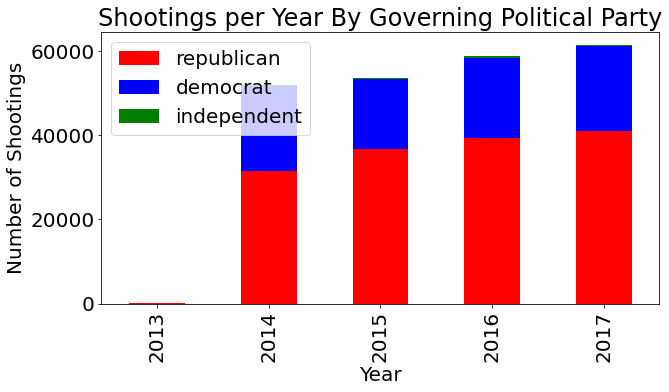

In [161]:
republican = [0,0,0,0,0]
democrat = [0,0,0,0,0]
independent = [0,0,0,0,0]

for key in dict_state_shootings_per_year:
    val = dict_state_shootings_per_year[key]
    i = 0
    while i < 5:
        if i == 0:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2013[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 1:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2014[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 2:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2015[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 3:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2016[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 4:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2017[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        i+=1

index = ['2013', '2014', '2015', '2016', '2017']
df_year_party = pd.DataFrame({'republican': republican, 'democrat': democrat, 'independent':independent}, index=index)
ax = df_year_party.plot.bar(stacked=True, color={"republican":"red", "democrat":"blue", "independent":"green"}, title="Shootings per Year By Governing Political Party")
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Shootings")
ax.set

Text(0.5, 0, 'Number of Shootings (Democrat/Republican)')

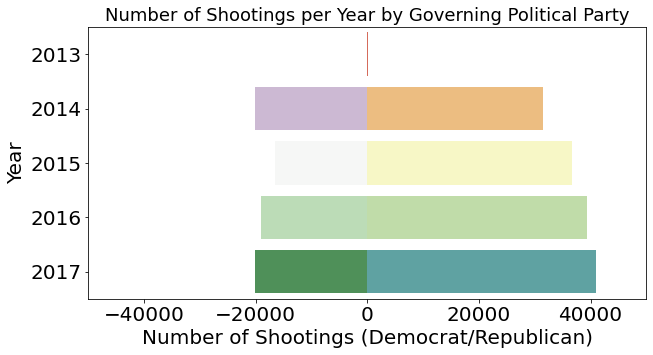

In [162]:
democrat = [-1*x for x in democrat]
plt.rcParams["figure.figsize"] = (10, 5)
df_party = pd.DataFrame({'Year': index, 
                    'Democrat': democrat, 
                    'Republican': republican})

#Class
YearClass = index
#Chart
bar_plot = sns.barplot(x='Democrat', y='Year', data=df_party, order=YearClass, lw=0, palette="PRGn")
bar_plot = sns.barplot(x='Republican', y='Year', data=df_party, order=YearClass, lw=0, palette="Spectral")
plt.xlim([-50000, 50000])
plt.title("Number of Shootings per Year by Governing Political Party", fontsize=18)
plt.xlabel("Number of Shootings (Democrat/Republican)")

In [170]:
# counting number of suspects for each incident:
def count(x):
    count = 0
#     print(x)
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count

def list_count(x):
    count = []
    for key in x:
        if x[key] == 'Subject-Suspect':
            count.append(key)
    return count

def make_groups(x):
    count = []
    for key in x:
        count.append(x[key])
    return count

def teen(x):
    count = 0
    for key in x:
        if x[key] == 'Teen 12-17':
            count += 1
    return count

def adult(x):
    count = 0
    for key in x:
        if x[key] == 'Adult 18+':
            count += 1
    return count


df_age['suspects_no'] = df_age['participant_type'].apply(count)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
df_age['suspect_age_groups'] = df_age['participant_age_group'].apply(make_groups)
df_age['suspect_teens'] = df_age['participant_age_group'].apply(teen)
df_age['suspect_adults'] = df_age['participant_age_group'].apply(adult)
df_age['combined'] = df_age.apply(lambda x: list([x['suspect_teens'],
                                        x['suspect_adults']]),axis=1) 
df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2158406511.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(count)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2158406511.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2158406511.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,victims_no,victims_list,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,0,[],[],0,0,0,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,1,[0],[Adult 18+],0,0,0,0,1,0,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,1,[0],[Teen 12-17],1,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,0,[],[],0,0,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,1,[0],[],0,0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,1,[0],[Adult 18+],0,0,1,0,0,0,0


In [164]:
# barplot of number of suspects per age group
# plt.figure()

# total_teens = df_age.loc[:, 'suspect_teens'].sum()
# total_adults = df_age.loc[:, 'suspect_adults'].sum()
# sns.barplot(x=['Teens', 'Adults'], y=[total_teens, total_adults])
# plt.show()

In [165]:
def count_sus(x):
    count = 0
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count

def list_count_sus(x):
    count = []
    for key in x:
        if x[key] == 'Subject-Suspect':
            count.append(key)
    return count

def count_vic(x):
    count = 0
    for key in x:
        if x[key] == 'Victim':
            count += 1
    return count

def list_count_vic(x):
    count = []
    for key in x:
        if x[key] == 'Victim':
            count.append(key)
    return count

def make_groups():
    total_count = []
    count = []
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age_group):
        count = []
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
#                 print(age_groups)
                count.append(age_groups[sus])
        total_count.append(count)
    return total_count

def teen():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age_group):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] == 'Teen 12-17':
                    count += 1
        total_count.append(count)
    return total_count

def adult_18_to_24():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 18 and age_groups[sus] <= 24:
                    count += 1
        total_count.append(count)
    return total_count

def adult_25_to_40():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 25 and age_groups[sus] <= 40:
                    count += 1
        total_count.append(count)
    return total_count

def adult_41_to_56():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 41 and age_groups[sus] <= 56:
                    count += 1
        total_count.append(count)
    return total_count

def adult_57_to_66():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 57 and age_groups[sus] <= 66:
                    count += 1
        total_count.append(count)
    return total_count

def adult_67_to_75():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 67 and age_groups[sus] <= 75:
                    count += 1
        total_count.append(count)
    return total_count

def adult_76_plus():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 76:
                    count += 1
        total_count.append(count)
    return total_count

# suspects
df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
df_age['suspect_age_groups'] = make_groups()
df_age['suspect_teens'] = teen()
df_age['suspect_18-24'] = adult_18_to_24()
df_age['suspect_25-40'] = adult_25_to_40()
df_age['suspect_41-56'] = adult_41_to_56()
df_age['suspect_57-66'] = adult_57_to_66()
df_age['suspect_67-75'] = adult_67_to_75()
df_age['suspect_76'] = adult_76_plus()

df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1575012633.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1575012633.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/1575012633.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,suspect_age_groups,suspect_teens,suspect_adults,combined,suspect_18-24,suspect_25-40,suspect_41-56,suspect_57-66,suspect_67-75,suspect_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,"[Teen 12-17, Adult 18+]",1,2,"[1, 2]",1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,[Adult 18+],0,1,"[0, 1]",0,1,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,[Teen 12-17],1,1,"[1, 1]",0,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,[Adult 18+],0,2,"[0, 2]",0,0,0,0,1,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,[],0,1,"[0, 1]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,[],0,0,"[1, 0]",0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,[Adult 18+],0,1,"[0, 1]",1,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,[Teen 12-17],1,0,"[2, 0]",0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,[],0,1,"[0, 1]",0,0,0,0,0,0


Teens :  2897
18-24 :  9067
25-40 :  10841
41-56 :  3169
57-66 :  752
67-75 :  238
75+ :  108
Total :  26320


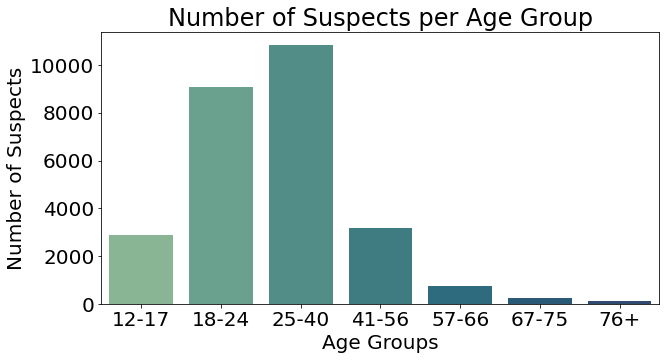

In [166]:
total_teens = df_age.loc[:, 'suspect_teens'].sum()
total_18_24 = df_age.loc[:, 'suspect_18-24'].sum()
total_25_40 = df_age.loc[:, 'suspect_25-40'].sum()
total_41_56 = df_age.loc[:, 'suspect_41-56'].sum()
total_57_66 = df_age.loc[:, 'suspect_57-66'].sum()
total_67_75 = df_age.loc[:, 'suspect_67-75'].sum()
total_75_plus = df_age.loc[:, 'suspect_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="crest")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Suspects")
plt.title("Number of Suspects per Age Group")
plt.rcParams.update({'font.size': 20})
plt.show()

In [167]:
def make_groups():
    total_count = []
    count = []
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age_group):
        count = []
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                count.append(age_groups[vic])
        total_count.append(count)
    return total_count

def teen():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age_group):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] == 'Teen 12-17':
                    count += 1
        total_count.append(count)
    return total_count

def adult_18_to_24():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 18 and age_groups[vic] <= 24:
                    count += 1
        total_count.append(count)
    return total_count

def adult_25_to_40():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 25 and age_groups[vic] <= 40:
                    count += 1
        total_count.append(count)
    return total_count

def adult_41_to_56():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 41 and age_groups[vic] <= 56:
                    count += 1
        total_count.append(count)
    return total_count

def adult_57_to_66():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 57 and age_groups[vic] <= 66:
                    count += 1
        total_count.append(count)
    return total_count

def adult_67_to_75():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 67 and age_groups[vic] <= 75:
                    count += 1
        total_count.append(count)
    return total_count

def adult_76_plus():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 76:
                    count += 1
        total_count.append(count)
    return total_count

# victims
df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
df_age['victim_age_groups'] = make_groups()
df_age['victim_teens'] = teen()
df_age['victim_18-24'] = adult_18_to_24()
df_age['victim_25-40'] = adult_25_to_40()
df_age['victim_41-56'] = adult_41_to_56()
df_age['victim_57-66'] = adult_57_to_66()
df_age['victim_67-75'] = adult_67_to_75()
df_age['victim_76'] = adult_76_plus()

df_age

C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2595485851.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2595485851.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
C:\Users\radhi\AppData\Local\Temp/ipykernel_7640/2595485851.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,victims_no,victims_list,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,0,[],[],0,0,0,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,1,[0],[Adult 18+],0,0,0,0,1,0,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,1,[0],[Teen 12-17],1,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,0,[],[],0,0,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,1,[0],[],0,0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,1,[0],[Adult 18+],0,0,1,0,0,0,0


Teens :  2794
18-24 :  8030
25-40 :  10647
41-56 :  3331
57-66 :  934
67-75 :  381
75+ :  190
Total :  25373


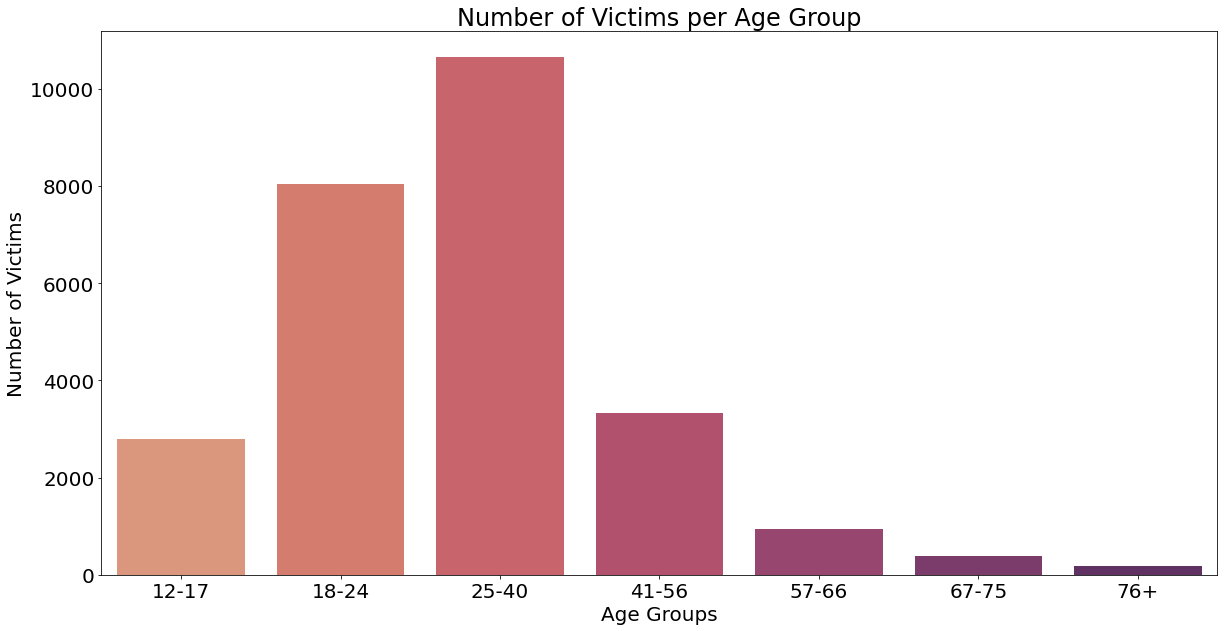

In [168]:
plt.figure()
total_teens = df_age.loc[:, 'victim_teens'].sum()
total_18_24 = df_age.loc[:, 'victim_18-24'].sum()
total_25_40 = df_age.loc[:, 'victim_25-40'].sum()
total_41_56 = df_age.loc[:, 'victim_41-56'].sum()
total_57_66 = df_age.loc[:, 'victim_57-66'].sum()
total_67_75 = df_age.loc[:, 'victim_67-75'].sum()
total_75_plus = df_age.loc[:, 'victim_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="flare")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Victims")
plt.title("Number of Victims per Age Group")
plt.rcParams.update({'font.size': 20})
plt.show()

In [169]:
df_count_2017_temp = df
df_count_2017 = pd.DataFrame(columns = ['state', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

states = sorted(list(df.state.unique()))
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

for i in states: 
    state_df = df_count_2017_temp[df_count_2017_temp.state == i] #dataframe for each state
    dict = {'state': i, 'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0} #what we want for that state
    for j in months.keys():
        count = 0
        for index, row in state_df.iterrows():
            if row['date'].month == j: 
                count = count + 1
            dict[months[j]] = count
    df_count_2017 = df_count_2017.append(dict, ignore_index=True)


df_count_2017

,state,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Alabama,105,97,121,134,127,129,127,143,122,120,127,109
1,Alaska,27,35,21,34,28,34,30,19,17,19,22,31
2,Arizona,49,29,35,46,58,38,68,48,47,66,51,52
3,Arkansas,67,56,81,67,76,63,72,75,60,77,67,59
4,California,335,326,407,409,384,572,505,355,311,316,321,347
5,Colorado,64,64,66,58,84,57,78,70,69,60,80,59
6,Connecticut,81,46,56,61,74,67,68,72,74,74,40,67
7,Delaware,45,25,22,47,41,36,32,23,35,30,26,27
8,District of Columbia,31,39,57,133,117,117,149,130,74,65,152,78
9,Florida,418,391,429,438,393,311,356,298,210,329,285,298
